# Connecting the Database

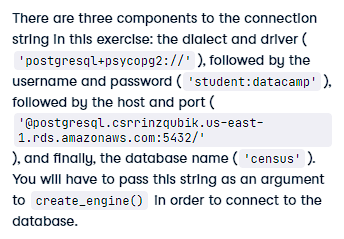

In [2]:
from sqlalchemy import MetaData, Table, select, create_engine

engine = create_engine('sqlite:///census.sqlite')
connection = engine.connect()  
metadata = MetaData()
census = Table('census', metadata, autoload = True, autoload_with = engine)


# Filtering

### WHERE


In [3]:
# Chosing only data from california (on 'State' Column)
query = select([census])
query = query.where(census.columns.state == 'California')

results = connection.execute(query).fetchall()

for result in results:
    print(result.state, result.age)

print(result.keys())

California 0
California 1
California 2
California 3
California 4
California 5
California 6
California 7
California 8
California 9
California 10
California 11
California 12
California 13
California 14
California 15
California 16
California 17
California 18
California 19
California 20
California 21
California 22
California 23
California 24
California 25
California 26
California 27
California 28
California 29
California 30
California 31
California 32
California 33
California 34
California 35
California 36
California 37
California 38
California 39
California 40
California 41
California 42
California 43
California 44
California 45
California 46
California 47
California 48
California 49
California 50
California 51
California 52
California 53
California 54
California 55
California 56
California 57
California 58
California 59
California 60
California 61
California 62
California 63
California 64
California 65
California 66
California 67
California 68
California 69
California 70
California 71
Ca

### Expression

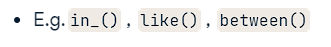

In [4]:
query = select([census])
query = query.where(census.columns.state.startswith('New'))

for result in connection.execute(query).fetchall():
    print(result.state, result.pop2000)


New Jersey 56983
New Jersey 56686
New Jersey 57011
New Jersey 57912
New Jersey 59359
New Jersey 60392
New Jersey 60739
New Jersey 61579
New Jersey 62089
New Jersey 63384
New Jersey 64593
New Jersey 62494
New Jersey 60570
New Jersey 58189
New Jersey 57931
New Jersey 56752
New Jersey 55887
New Jersey 56712
New Jersey 53265
New Jersey 48344
New Jersey 49564
New Jersey 48141
New Jersey 48353
New Jersey 49130
New Jersey 48723
New Jersey 51092
New Jersey 50357
New Jersey 52179
New Jersey 55938
New Jersey 60638
New Jersey 64220
New Jersey 61484
New Jersey 61927
New Jersey 63487
New Jersey 66737
New Jersey 71274
New Jersey 71449
New Jersey 71026
New Jersey 71811
New Jersey 72043
New Jersey 73665
New Jersey 70514
New Jersey 69835
New Jersey 68650
New Jersey 65564
New Jersey 65529
New Jersey 61817
New Jersey 59206
New Jersey 56977
New Jersey 55780
New Jersey 56235
New Jersey 53235
New Jersey 54900
New Jersey 58013
New Jersey 43584
New Jersey 42959
New Jersey 42179
New Jersey 45575
New Jersey 383

### Cunjunctions

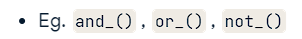

In [5]:
from sqlalchemy import or_
query = select([census])  #Chosing the entire table
query = query.where(
    or_(census.columns.state == 'California',
        census.columns.state == 'New York'
))

for result in connection.execute(query):
    print(result.state, result.sex)

New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
New York M
California M
California M
California M
California M
California M
California M
California M
Califor

# ORDER


### Single Ordering

In [9]:
query = select([census.columns.state]) #Select state column only
query = query.order_by(census.columns.state) # Order by state column too note: can be different
results = connection.execute(query).fetchall()

results

[('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama',),
 ('Alabama

In [13]:
query = select([census.columns.state, census.columns.sex]) #Select state column only
query = query.order_by(census.columns.state) # Order by state column too note: can be different
results = connection.execute(query).fetchall()

results

('Alabama', 'M')

#### Descending

In [14]:
from sqlalchemy import desc

query = select([census.columns.state, census.columns.sex]) #Select state column only
query = query.order_by(desc(census.columns.state)) # Order by state column too note: can be different
results = connection.execute(query).first()

results

('Wyoming', 'M')

### Multiple Ordering

In [11]:
query = select([census.columns.state, census.columns.sex]) #Select state column only
query = query.order_by(census.columns.state, census.columns.sex) # Order by state column too note: can be different
results = connection.execute(query).first()

results

('Alabama', 'F')

# Counting, Summing, and Grouping

### SUM

In [17]:
from sqlalchemy import func

query = select([func.sum(census.columns.pop2008)])
results= connection.execute(query)
print(results)

In [18]:

results= connection.execute(query).fetchone()
print(results)

(302876613,)


In [19]:
results= connection.execute(query).scalar()
print(results)

302876613


### Count Distinct

In [26]:
# Build a query to count the distinct states values: stmt
stmt = select([func.count(census.columns.state.distinct())])

# Execute the query and store the scalar result: distinct_state_count
distinct_state_count = connection.execute(stmt).scalar()

# Print the distinct_state_count
print(distinct_state_count)


51


### Group by

In [22]:
query = select([census.columns.sex, 
                func.sum(census.columns.pop2008)])
query = query.group_by(census.columns.sex)              # Group by Statement
results = connection.execute(query).fetchall()
print(results)

[('F', 153959198), ('M', 148917415)]


### Group by Multiple

In [24]:
query = select([census.columns.sex,
                census.columns.age,
                func.sum(census.columns.pop2008)])
query = query.group_by(census.columns.sex,
                       census.columns.age)            
results = connection.execute(query).fetchall()
print(results)
print(results[0].keys())  # note that new column has been created (sum_1)

[('F', 0, 2105442), ('F', 1, 2087705), ('F', 2, 2037280), ('F', 3, 2012742), ('F', 4, 2014825), ('F', 5, 1991082), ('F', 6, 1977923), ('F', 7, 2005470), ('F', 8, 1925725), ('F', 9, 1905935), ('F', 10, 1909338), ('F', 11, 1923628), ('F', 12, 1960942), ('F', 13, 1990284), ('F', 14, 2007966), ('F', 15, 2047109), ('F', 16, 2086274), ('F', 17, 2118217), ('F', 18, 2151506), ('F', 19, 2071680), ('F', 20, 2042212), ('F', 21, 2023820), ('F', 22, 2035751), ('F', 23, 2047109), ('F', 24, 2010175), ('F', 25, 2043330), ('F', 26, 2071963), ('F', 27, 2114346), ('F', 28, 2111476), ('F', 29, 2009546), ('F', 30, 1955430), ('F', 31, 1933802), ('F', 32, 1887669), ('F', 33, 1944248), ('F', 34, 1893332), ('F', 35, 1944749), ('F', 36, 2038510), ('F', 37, 2158525), ('F', 38, 2188432), ('F', 39, 2074738), ('F', 40, 2040883), ('F', 41, 2051985), ('F', 42, 2107555), ('F', 43, 2251441), ('F', 44, 2296876), ('F', 45, 2294913), ('F', 46, 2300277), ('F', 47, 2330046), ('F', 48, 2359864), ('F', 49, 2274368), ('F', 50,

to prevent unwanted name on created column, use this : 

In [25]:
query = select([census.columns.sex,
                census.columns.age,
                func.sum(census.columns.pop2008).label('pop2008_sex_age_sum')])  # giving the label to new column
query = query.group_by(census.columns.sex,
                       census.columns.age)            
results = connection.execute(query).fetchall()
print(results)
print(results[0].keys())

[('F', 0, 2105442), ('F', 1, 2087705), ('F', 2, 2037280), ('F', 3, 2012742), ('F', 4, 2014825), ('F', 5, 1991082), ('F', 6, 1977923), ('F', 7, 2005470), ('F', 8, 1925725), ('F', 9, 1905935), ('F', 10, 1909338), ('F', 11, 1923628), ('F', 12, 1960942), ('F', 13, 1990284), ('F', 14, 2007966), ('F', 15, 2047109), ('F', 16, 2086274), ('F', 17, 2118217), ('F', 18, 2151506), ('F', 19, 2071680), ('F', 20, 2042212), ('F', 21, 2023820), ('F', 22, 2035751), ('F', 23, 2047109), ('F', 24, 2010175), ('F', 25, 2043330), ('F', 26, 2071963), ('F', 27, 2114346), ('F', 28, 2111476), ('F', 29, 2009546), ('F', 30, 1955430), ('F', 31, 1933802), ('F', 32, 1887669), ('F', 33, 1944248), ('F', 34, 1893332), ('F', 35, 1944749), ('F', 36, 2038510), ('F', 37, 2158525), ('F', 38, 2188432), ('F', 39, 2074738), ('F', 40, 2040883), ('F', 41, 2051985), ('F', 42, 2107555), ('F', 43, 2251441), ('F', 44, 2296876), ('F', 45, 2294913), ('F', 46, 2300277), ('F', 47, 2330046), ('F', 48, 2359864), ('F', 49, 2274368), ('F', 50,

# SQLAlchemy and Pandas

### Pandas

In [32]:
import pandas as pd
df = pd.DataFrame(results)
df.columns = results[0].keys()  # Serring the column name
df

,sex,age,pop2008_sex_age_sum
0,F,0,2105442
1,F,1,2087705
2,F,2,2037280
3,F,3,2012742
4,F,4,2014825
...,...,...,...
167,M,81,488633
168,M,82,441464
169,M,83,413678
170,M,84,368867


### Graphic

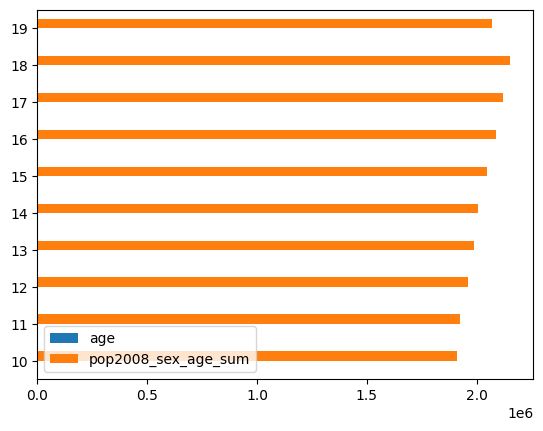

In [33]:
import matplotlib.pyplot as plt

df[10:20].plot.barh()    #Bar Horizontal
plt.show()